In [315]:
import random
import numpy as np
amino_acids = 'ACDEFGHIKLMNPQRSTVWY'

print(random.choice(amino_acids))
def generate_random_protein_sequence(length):
    sequence = []
    aa=[random.choice(amino_acids) for _ in range(length)]
    return aa

sequence_length = 100

def generate_sequences(length, quantity):
    sequences = []
    for i in range(quantity):
        sequences.append(generate_random_protein_sequence(length))
    return np.array(sequences)


def generate_2(lenght, NumSEQ):
    sequences = []
    fav_aa_fr = np.random.uniform((1/20), (lenght-19)/(lenght*2), NumSEQ)
    for c in fav_aa_fr:
        rand_seq = random.choices(amino_acids, weights=([c]+[(1-c)/19]*19), k = lenght)
        sequences.append(rand_seq)
    return(np.array(sequences))

P


In [256]:
aa =[1, 2, 1, 3, 2, 4, 6, 3]
a = set(aa)
len(a)

5

In [267]:
import matplotlib.pyplot as plt
def Column_diversity(matrix):
    Diversity = []
    Tmatrix = matrix.T
    for i in range (len(Tmatrix)):
        Tset = set(Tmatrix[i])
        Diversity.append(len(Tset))
    plt.hist(Diversity)
    return Diversity

In [258]:
from scipy.spatial.distance import squareform

def calculate_distance(x):
    distance = []
    pair = 1
    for i in range(len(x)):
        for j in range(pair, len(x)):
            distance.append((len(x[0]) - sum(x[i]==x[j]))/len(x[0]))
        pair += 1
    distance_length = len(distance)
    # distance = squareform(distance)
    average_distance = sum(distance)/distance_length
    return distance, average_distance
distance = calculate_distance(matrix_of_sequences)
dist = []
# for i in range(50, 100):
#     dist.append(calculate_distance(generate_sequences(100, i))[1])


In [ ]:
len(matrix_of_sequences[0])

100

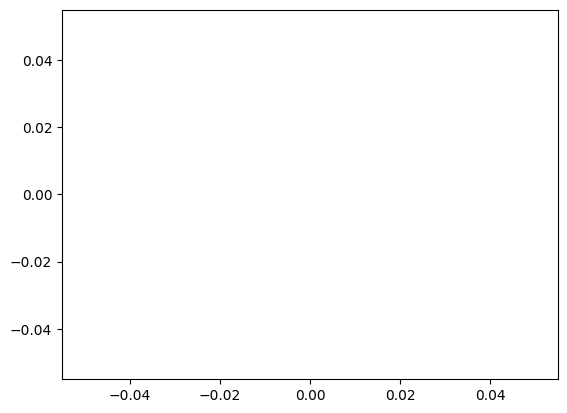

In [ ]:
import matplotlib.pyplot as plt
plt.plot(dist)

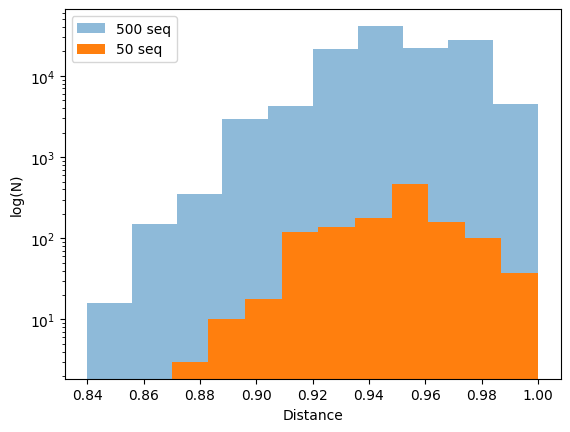

In [ ]:
dist500 = calculate_distance(generate_sequences(100, 500))[0]
dist50 = calculate_distance(generate_sequences(100, 50))[0]


plt.hist(dist500, alpha = 0.5, bins=10, label='500 seq')
plt.hist(dist50, bins=10, label='50 seq')
# plt.xscale('log')
plt.yscale('log')
plt.ylabel('log(N)')
plt.xlabel('Distance')
plt.legend()

In [401]:
#importing modules
import argparse
import pandas as pd
import re
import os
import numpy as np
import itertools
from scipy import stats
import ast
#from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import math

def t_student_one_sided(sample_size, p=0.05):
    # One-sided inverse Students t-distribution
    # p - probability, df - degrees of freedom
    tinv = lambda p, df: abs(stats.t.ppf(p, df))
    return(tinv(p, sample_size-2)) # Returns: The critical value from the one-sided t-distribution.

# def matrix_to_array(matrix, nparray=False, in_folder='', from_file = False):
#     """
#     Function to convert the upper triangular matrix into a 1-dimensional array with matrix values (from upper half of the input matrix) 
#     Possible input file format examples:
#     when nparray==False:
#     Square matrix in csv format (either upper triangular or symmetric but NOT lower triangular):
#     0,1,2
#     0,0,3
#     0,0,0
    
#     when nparray==True:
#     Square matrix in np.array format (either upper triangular or symmetric but NOT lower triangular):
#     array([[0, 1, 2],
#            [1, 0, 3],
#            [2, 3, 0]]))
#     """
#     #first, we open an input matrix in n-dimensional numpy array format, for example:
#     #    array([[0, 1, 2],
#     #           [0, 0, 3],
#     #           [0, 0, 0]]))
    
#     if from_file==True:
#         if nparray==True: #if input file is a np.array in a txt file (nparray variable should be set to True) 
#             pdist=np.array(ast.literal_eval(open(in_folder+matrix).read()))
#         else: #if input file is a csv
#             pdist=pd.read_csv(in_folder+matrix, header=None).to_numpy()
#             return(list(pdist[np.triu_indices(np.shape(pdist)[0], k = 1)]), len(pdist))

    #return only the elements above diagonal with np.triu_indices function as a 1d array given the matrix dimension (number of rows/columns)    
    # else:
    #     return(list(matrix[np.triu_indices(np.shape(matrix)[0], k = 1)]), len(matrix))

# Функція для побудови графіка залежності кількості пар на заданій відстані від самої відстані

def get_curves_LD_all_kcoefs_ranges(k, log=False, norm=False,  numbins=200, nparray=False, in_folder='', from_file=False, flat=False):
    """Function to plot the number of pairs at a given distance against the distance"""
    
    #read pairwise distance matrix as an 1d array
    # if flat==True:
    #     k, size= matrix
    # else:
    #     k,size=squareform(matrix, nparray=nparray, in_folder=in_folder, from_file=from_file)
    size = len(k)
    #creates a histogram of the distances
    if log==True:
        # using logspace so that the points appear to be equally spaced in the log scale
        binn=np.histogram(k, bins=list(np.append(np.zeros(1), np.logspace(-2.99573227,0,numbins,base=math.e))))
    else:
        binn=np.histogram(k, bins=list(np.linspace(0,1, numbins+1)))
    #get x axis (range of pairwise distances)
    dista=np.log(binn[1][1:])
    #get y axis (cumulative pairs counts)
    cumulative=np.cumsum(binn[0])
    
    #check if there are any empty bins at small distances
    #if there are any, these bins will be excluded (because np.log(0)=-inf which is a problem during dimension calculation)
    if 0 in cumulative:
        last0_ind=np.where(cumulative==0)[0][-1]+1
        cumulative=cumulative[last0_ind:]
        dista=dista[last0_ind:]
    #normalize y scale or not: DOES NOT alter dimension value in the end, only usefull for visualization purposes
    if norm==True:
        # applying the Normalization: log(E)/N^2
        return(dista, np.log(cumulative/size**2))
    else:
        return(dista, np.log(cumulative))
    
def max_k(matrix, log=False, win_size_perc=0.04, numbins=200, t_stud=None, mode='max', norm=False, plot=False, in_folder='', out_folder='',out_plots='',nparray=False,from_file=True,save_picture=False, flat=False, label=''):
    
    """
    Function to calculate dimension from the matrix of pairwise distances.
    Supports three modes of calculation: 
    - MODE="max": dimension is the highest slope of the linear regression slopes done on all windows of size WIN_SIZE_PERC*NUMBINS
    - MODE="min_max": same as "max" mode + it gives a min_k value - the slope of the curve from 0% sequence distance to (but not including) the 
      first point included in region used to calculate max_k
    - MODE="min_max_50": function outputs the "max" and "min" dimension values and "0-50%" dimension 
      (the slope of the linear regression done on the first WIN_SIZE_PERC*NUMBINS (0-WIN_SIZE_PERC% divergence))
    """
    #get the file name prefix 
    # if flat==False:
    #     fn=re.findall('(.+)\.', matrix)[0]
    # else:
    #     fn='simulated_matrix'
    
    #get x and y for regression, where
    #x - pairwise distance in log scale (0-100% divergence)
    #y - log of number of pairs per bin at a a given pairwise distance
    (x, y)=get_curves_LD_all_kcoefs_ranges(matrix, log=log, norm =norm, numbins=numbins, nparray=nparray, in_folder=in_folder, from_file = from_file, flat=flat)

    slopes = []
    x_range = []
    rvals= []
    sterrs = []
    bs = []
    
    win_size=int(win_size_perc*numbins)
    length=len(x)
        #to find maximun slope check all intervals of the curve of length WIN_SIZE
    for i in range(len(x)-win_size+1):
        win_x=x[i:i+win_size]
        win_y=y[i:i+win_size]
        slope, b, r_value, p_value, std_err =  stats.linregress(win_x, win_y)
        #record only positive slopes
        if slope <= 0:
            continue
        slopes.append(slope)
        rvals.append(r_value)
        x_range.append(win_x)
        bs.append(b)
        sterrs.append(std_err)
        
    if len(slopes) == 0:
        raise ValueError(
            """
            No positive slopes or no windows
            with all values above threshold found!
            """
            )

    max_k = max(slopes)
    ind=slopes.index(max_k)
    max_x = x_range[ind]
    max_r = rvals[ind]
    max_b = bs[ind]
    
        
    #adjustment in case the actual length of the x axis is different from numbins (empty bins removed in get_curves_LD_all_kcoefs_ranges function)
    difflen=numbins-length    

    #get the range of the distances used to get the highest slope
    if log==True:
        x_coor_nolog=list(np.append(np.zeros(1), np.logspace(-2.99573227,0,numbins,base=math.e)))[difflen:]
        log_str='log'
    else:
        x_coor_nolog=list(np.linspace(0,1, numbins+1))[difflen:]
        log_str='non_log'

    range_start=x_coor_nolog[ind]
    range_end=x_coor_nolog[ind+win_size]

        
    #calculate confidence interval for the slope
    #one sided T Student test is performed because our curve is cumulative, therefore slope will be > 0
    if t_stud!=None and difflen==0:
        #use precalculated t_student value
        max_ci=t_stud*sterrs[ind]
    else:
        t_stud=t_student_one_sided(win_size)
        max_ci=t_stud*sterrs[ind]
    
    
    #saving plot    
    if plot ==True and flat==False:
        plt.scatter(x, y, label= label)
        #plot max slope
        plt.plot(max_x, max_k*max_x + max_b, label="{:.2f}-{:.2f}, y={:.2f}x+{:.2f}\nR^2={:.3f}, 95% CI={:.3f}".format(range_start, range_end, max_k, max_b,max_r**2, max_ci), c='r')
        plt.legend(loc='lower right', prop={'size': 9}) # move the legend 
        plt.ylabel('log(N)')
        plt.xlabel('log(Pairwise distance)')
        plt.show()
        if save_picture==True:        
            plt.savefig(out_plots+'%s_%s_%s_%s.png' % (fn, log_str, str(win_size_perc), str(numbins)))
    return(max_k, max_ci)   



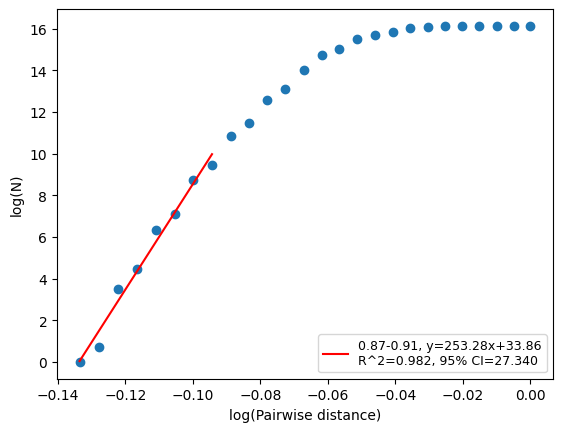

(253.2751131938721, 27.340119740815567)

In [394]:
distance, average_distance = calculate_distance(generate_sequences(300, 4500))
max_k(distance)

In [397]:
def Calculate_dimensions_and_average(length, list_of_sequences:list, number_of_iterarions):
    d = {}
    for seq in list_of_sequences:
        dim = []
        average = []
        for i in range(number_of_iterarions):
            distance, average_distance = calculate_distance(generate_sequences(length, seq))
            dim.append(max_k(distance)[0])
            average.append(average_distance)
        d[f'average for {seq}'] = average
        d[f'dimensions for {seq}'] = dim
    return pd.DataFrame(d)


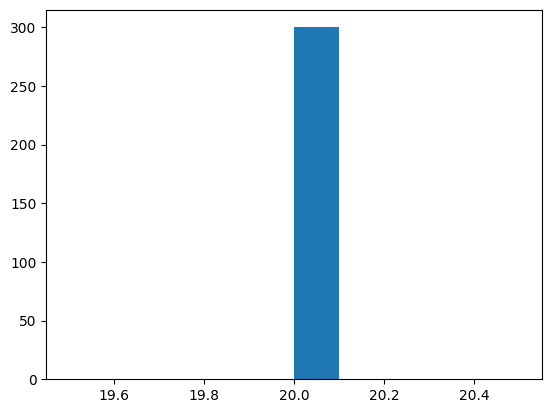

In [338]:
d = Column_diversity(generate_2(300, 200))

In [403]:
Data1 = Calculate_dimensions_and_average(300, [200, 500, 700, 1000], 50)

Data1

,average for 200,dimensions for 200,average for 500,dimensions for 500,average for 700,dimensions for 700,average for 1000,dimensions for 1000
0,0.949953,180.532959,0.950000,214.232182,0.950042,185.185946,0.949992,223.059135
1,0.949966,175.833659,0.949993,188.960979,0.949982,187.538067,0.949998,207.612270
2,0.949981,188.528238,0.950002,204.376450,0.950000,208.368606,0.949987,218.317115
3,0.950059,195.526108,0.950048,218.489106,0.950003,185.804721,0.949992,223.575555
4,0.949957,189.856778,0.950045,183.651033,0.950002,181.076145,0.950017,210.142431
5,0.950015,165.632238,0.950042,186.749809,0.950004,201.237985,0.949981,227.553638
6,0.949952,172.895284,0.949948,190.356513,0.950038,208.337039,0.949996,213.928114
7,0.950182,168.868658,0.949983,210.605580,0.949970,198.584265,0.949980,197.246260
8,0.950045,183.949356,0.949986,184.714602,0.950005,215.834745,0.950011,203.230742
9,0.950052,187.383216,0.950024,173.620649,0.949987,198.479650,0.950030,219.724022


In [405]:
Data1.to_csv('random_len300_numseq_200_500_700_1000_dist_dim.csv', index = False)

In [339]:

Data2 = Calculate_dimensions_and_average(300, [200, 500, 700, 1000], 50)

Data2

,average for 200,dimensions for 200,average for 500,dimensions for 500,average for 700,dimensions for 700,average for 1000,dimensions for 1000
0,0.906380,57.095824,0.901545,62.798810,0.904943,63.220216,0.906002,62.320306
1,0.908187,59.679640,0.903294,61.822841,0.902855,54.205201,0.907214,62.715567
2,0.903725,63.116296,0.905013,66.512545,0.904645,64.671392,0.906182,58.208655
3,0.911487,50.854736,0.907402,58.479021,0.900204,62.313690,0.902045,62.866043
4,0.901324,66.786687,0.900441,59.971994,0.905301,57.576980,0.904437,76.299088
5,0.901679,57.472670,0.903742,60.899191,0.905453,65.796092,0.904353,60.701400
6,0.903563,61.248687,0.906337,58.921562,0.904776,59.907406,0.904796,74.141330
7,0.906388,47.653822,0.907993,53.573203,0.903192,55.870482,0.905229,63.787665
8,0.904848,64.335257,0.905571,67.905768,0.901453,64.122752,0.905384,56.445263
9,0.906976,44.649105,0.905229,57.109555,0.903621,57.583505,0.902947,65.969856


In [340]:
Data2.to_csv('not_random_len300_numseq_200_500_700_1000_dist_dim.csv', index = False)

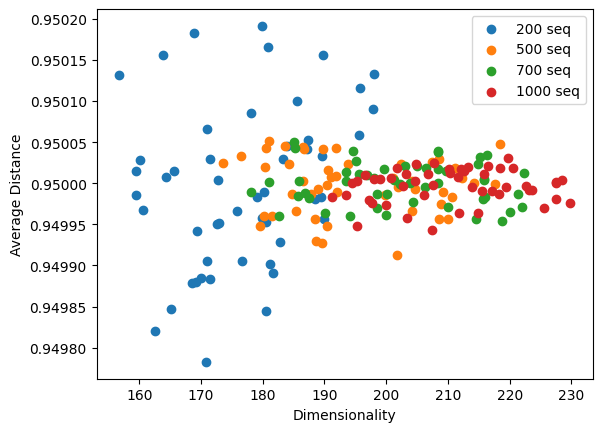

In [406]:

plt.scatter(Data1['dimensions for 200'], Data1['average for 200'], label= '200 seq')
plt.scatter(Data1['dimensions for 500'], Data1['average for 500'], label= '500 seq')
plt.scatter(Data1['dimensions for 700'], Data1['average for 700'], label= '700 seq')
plt.scatter(Data1['dimensions for 1000'], Data1['average for 1000'], label= '1000 seq')

plt.ylabel('Average Distance')
plt.xlabel('Dimensionality')
plt.legend()

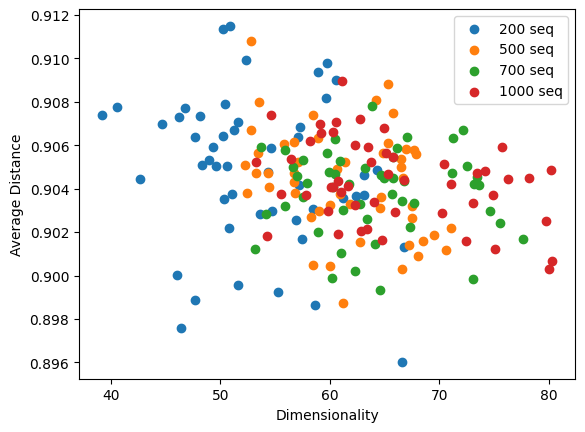

In [341]:
plt.scatter(Data2['dimensions for 200'], Data2['average for 200'], label= '200 seq')
plt.scatter(Data2['dimensions for 500'], Data2['average for 500'], label= '500 seq')
plt.scatter(Data2['dimensions for 700'], Data2['average for 700'], label= '700 seq')
plt.scatter(Data2['dimensions for 1000'], Data2['average for 1000'], label= '1000 seq')

plt.ylabel('Average Distance')
plt.xlabel('Dimensionality')
plt.legend()

In [ ]:
plt.boxplot(Data2['dimensions for 200'], label= '200 seq')
plt.scatter(Data2['dimensions for 500'], Data2['average for 500'], label= '500 seq')
plt.scatter(Data2['dimensions for 700'], Data2['average for 700'], label= '700 seq')
plt.scatter(Data2['dimensions for 1000'], Data2['average for 1000'], label= '1000 seq')

plt.ylabel('Average Distance')
plt.xlabel('Dimensionality')
plt.legend()

,average for 50,dimensions for 50,average for 200,dimensions for 200,average for 500,dimensions for 500
0,0.950109,91.485946,0.950112,110.464827,0.950040,117.398084
1,0.950367,42.540820,0.949976,104.522638,0.950009,115.227128
2,0.949241,89.716989,0.949848,99.040592,0.950066,111.333952
3,0.949657,83.253162,0.949950,42.742692,0.950009,112.784562
4,0.950286,42.804128,0.949975,106.892273,0.950011,111.301075
5,0.949633,44.714406,0.949949,114.780195,0.950061,114.424513
6,0.949948,46.229284,0.949967,102.260244,0.950033,113.430739
7,0.949943,41.764816,0.949926,110.204561,0.950036,110.582194
8,0.950150,41.783133,0.950032,43.568600,0.949967,118.554944
9,0.949818,91.169919,0.950139,122.547332,0.950014,115.173122


C:\Users\Sasha\AppData\Local\Temp\ipykernel_23092\1122357614.py:10: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(NewData1, labels = ['200', '500', '700', '1000'])


Text(0.5, 0, 'Length')

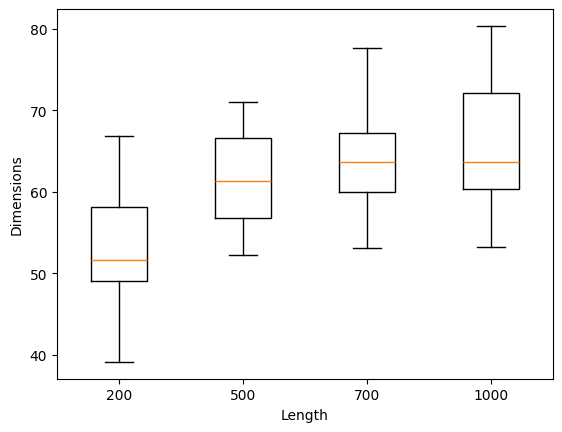

In [378]:
NewData = {}

NewData['200'] = Data2['dimensions for 200']
NewData['500'] = Data2['dimensions for 500']
NewData['700'] = Data2['dimensions for 700']
NewData['1000'] = Data2['dimensions for 1000']
NewData1 = pd.DataFrame(NewData)
NewData1

plt.boxplot(NewData1, labels = ['200', '500', '700', '1000'])
plt.ylabel('Dimensions')
plt.xlabel('Length')


C:\Users\Sasha\AppData\Local\Temp\ipykernel_23092\2121519841.py:10: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(NewData1, labels = ['200', '500', '700', '1000'])


Text(0.5, 0, 'Length')

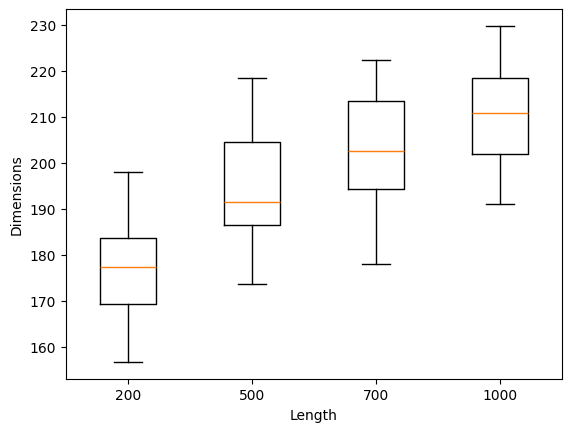

In [408]:
NewDatar = {}

NewDatar['200'] = Data1['dimensions for 200']
NewDatar['500'] = Data1['dimensions for 500']
NewDatar['700'] = Data1['dimensions for 700']
NewDatar['1000'] = Data1['dimensions for 1000']
NewData1 = pd.DataFrame(NewDatar)
NewData1

plt.boxplot(NewData1, labels = ['200', '500', '700', '1000'])
plt.ylabel('Dimensions')
plt.xlabel('Length')


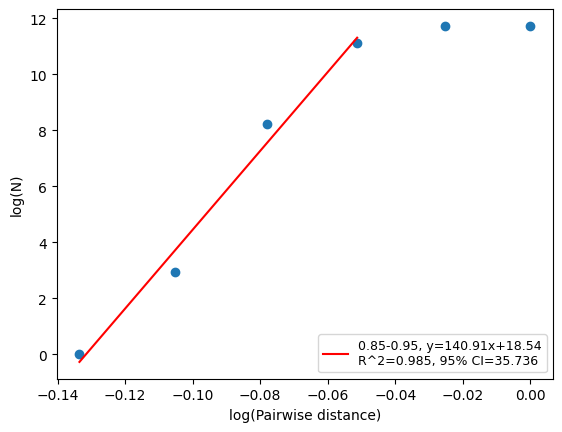

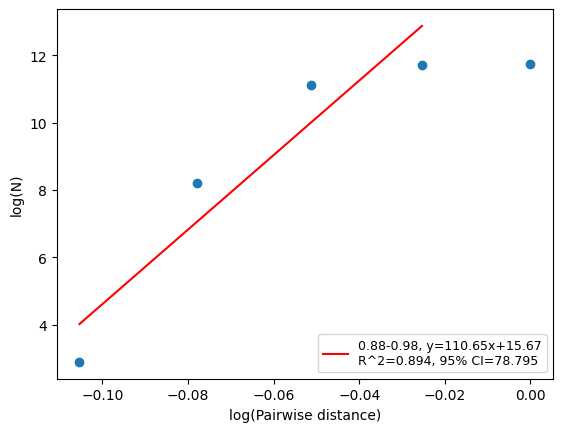

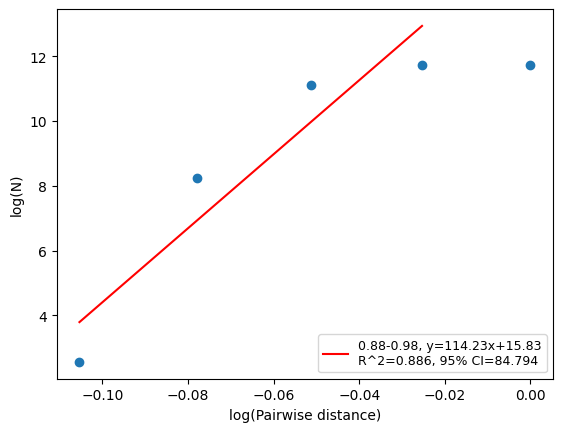

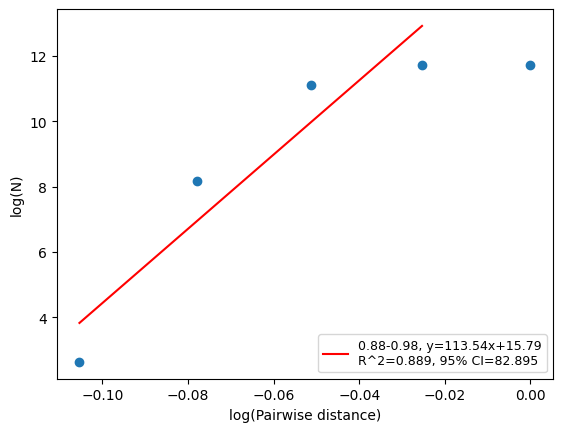

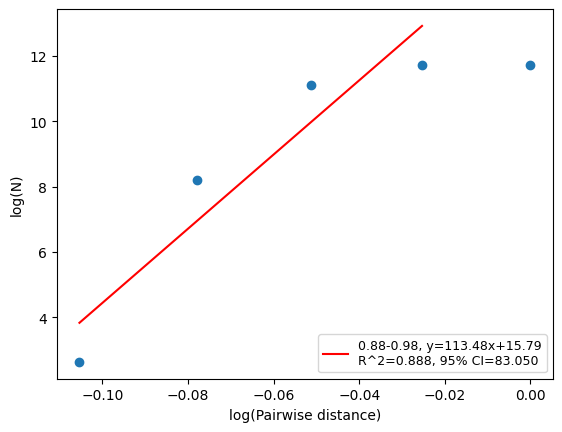

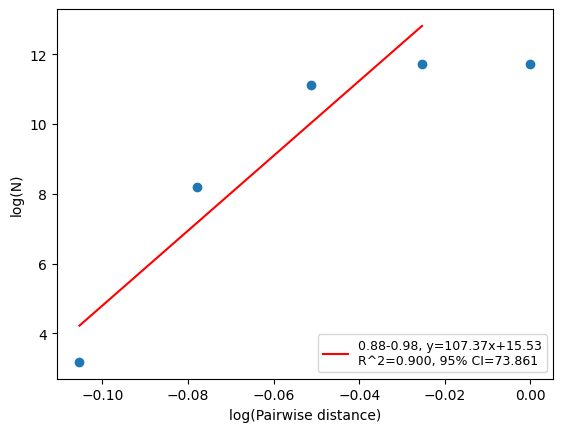

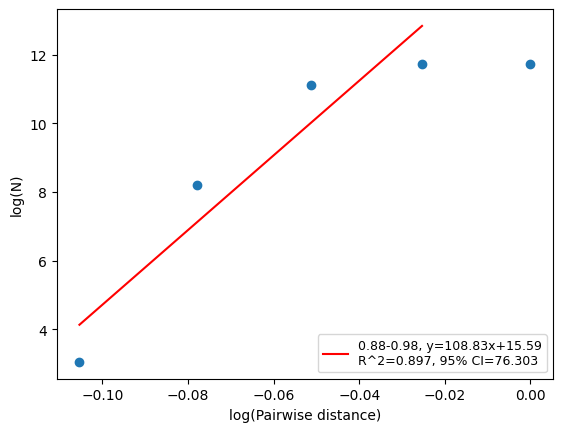

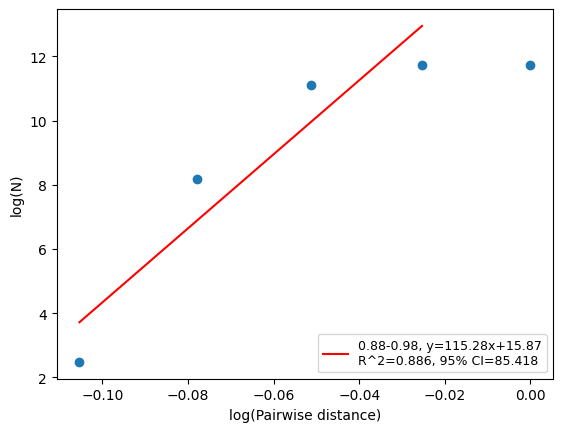

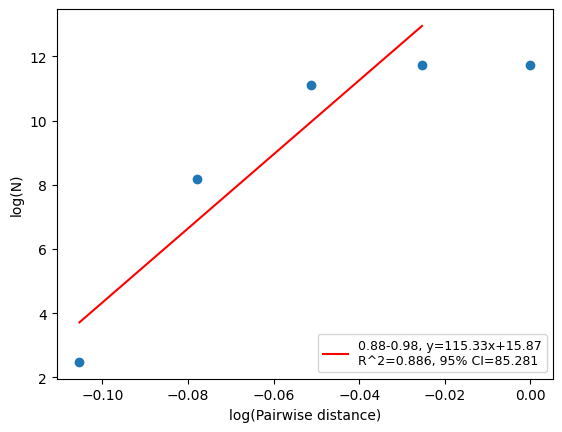

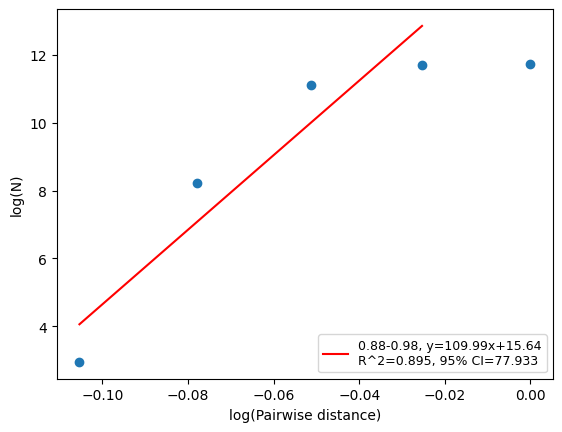

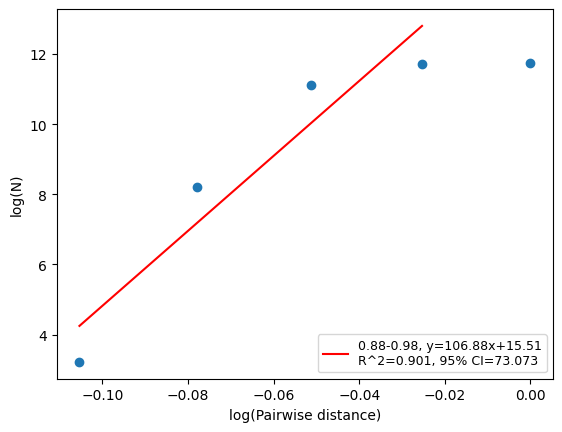

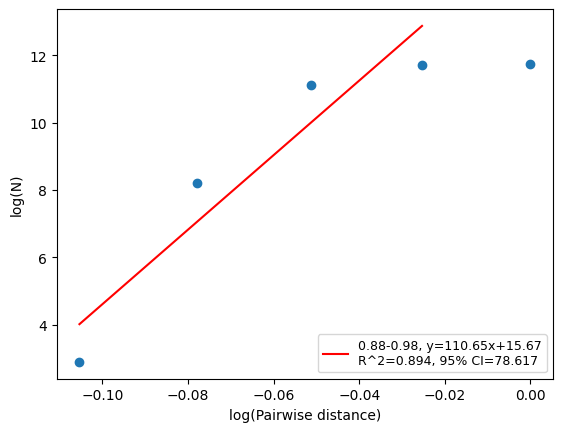

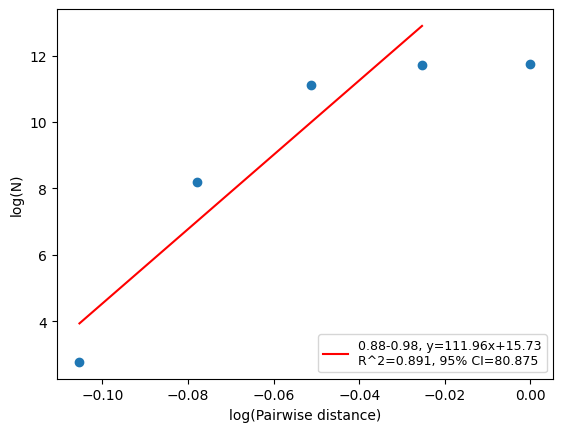

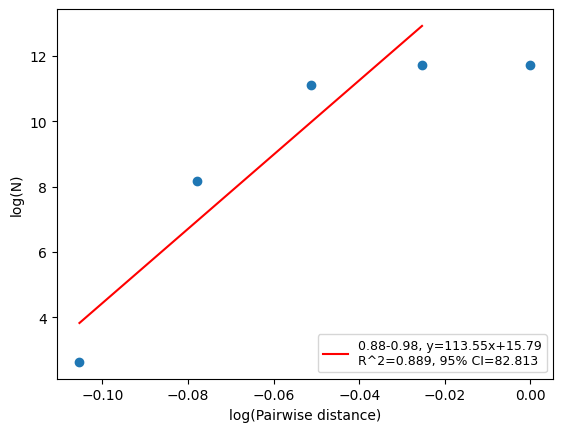

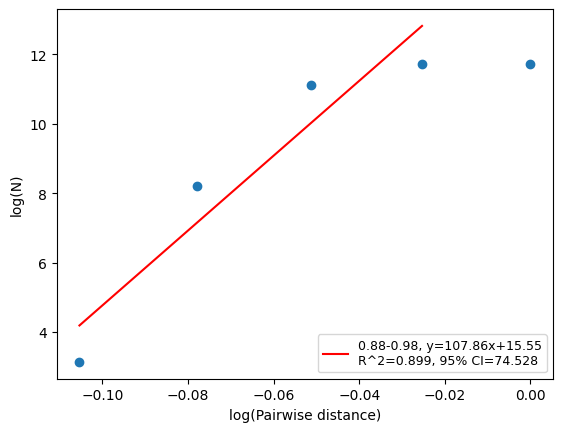

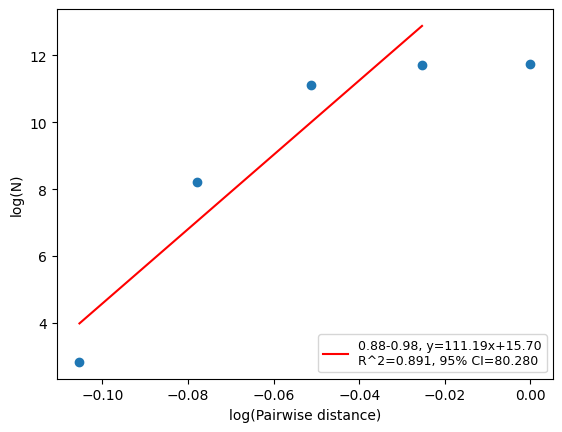

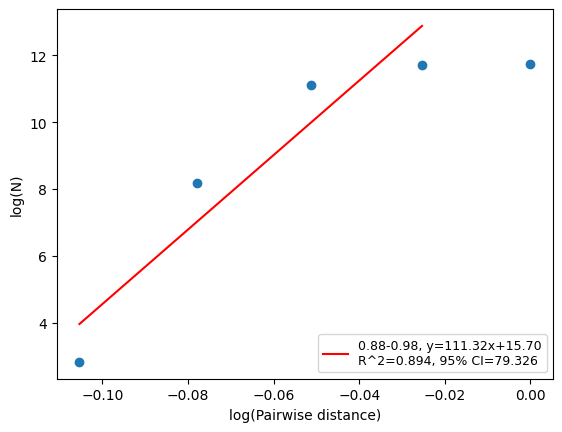

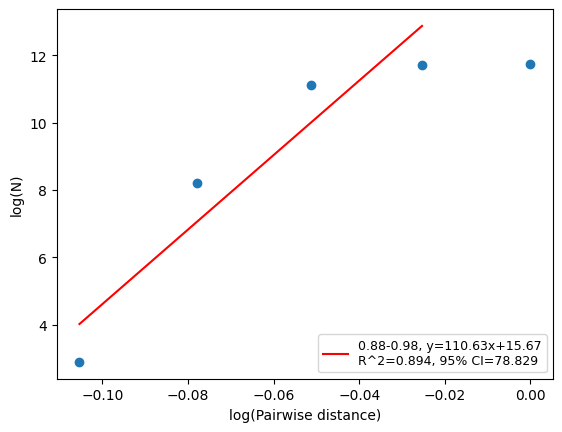

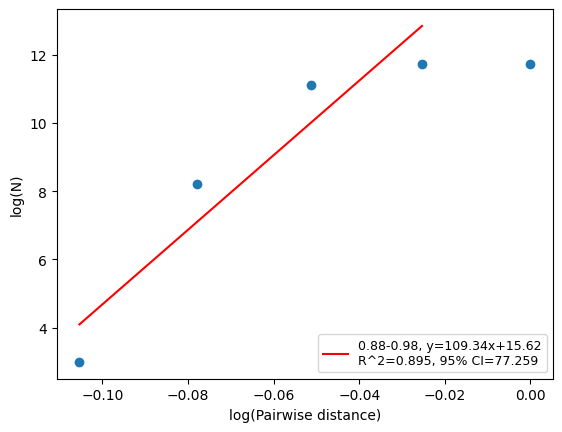

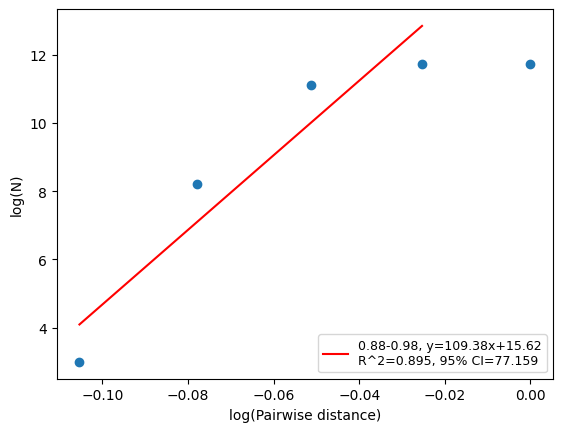

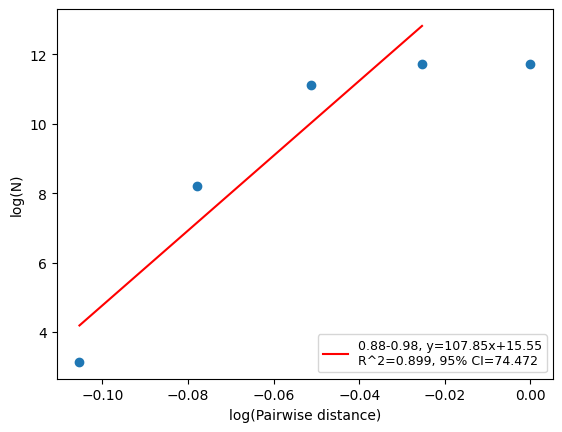

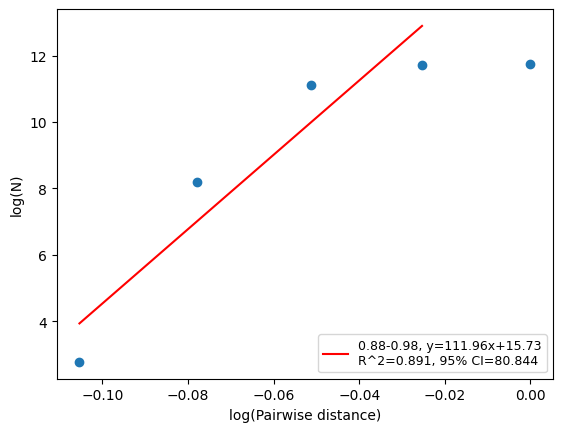

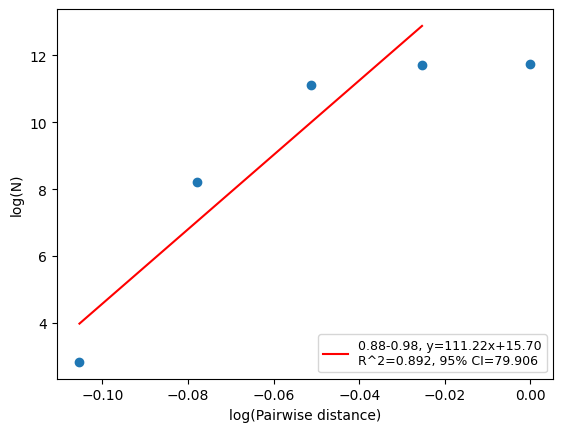

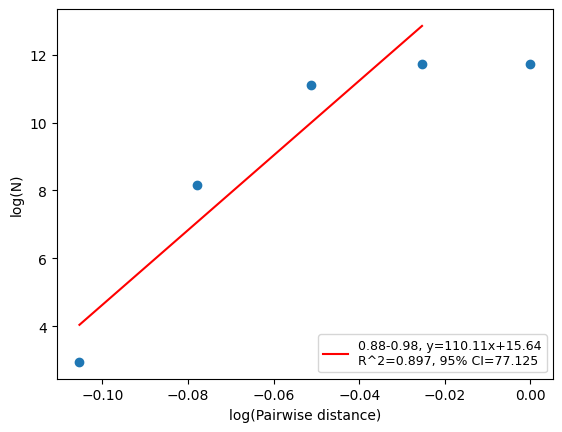

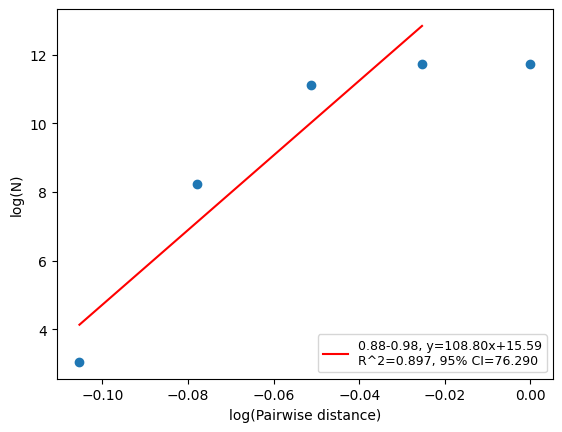

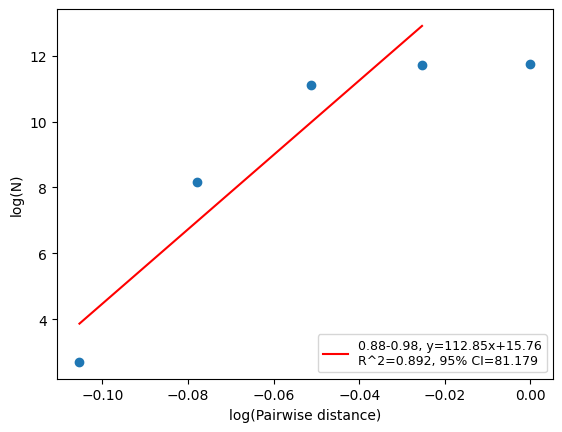

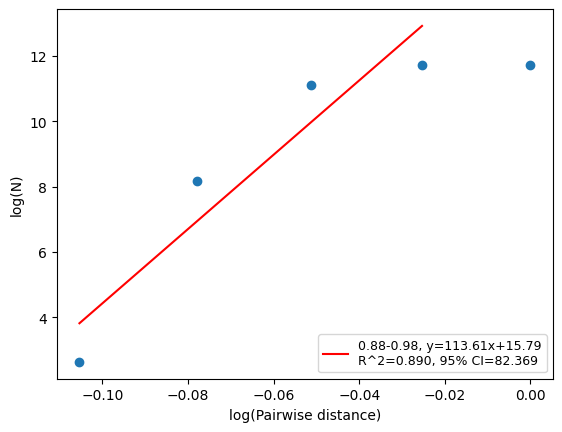

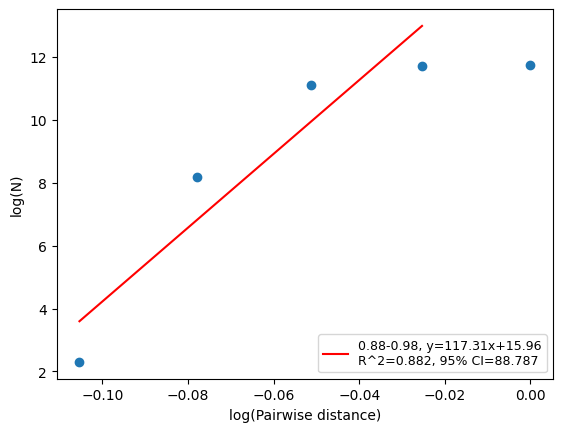

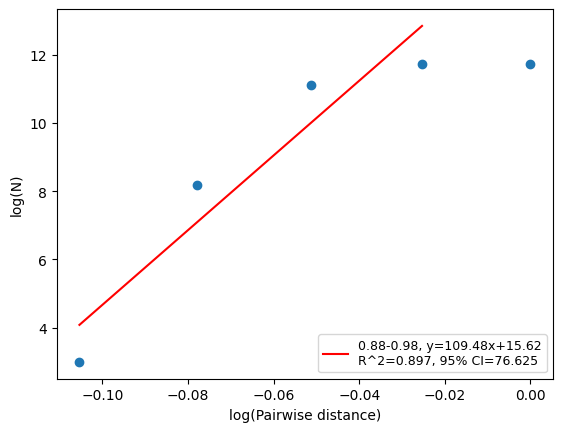

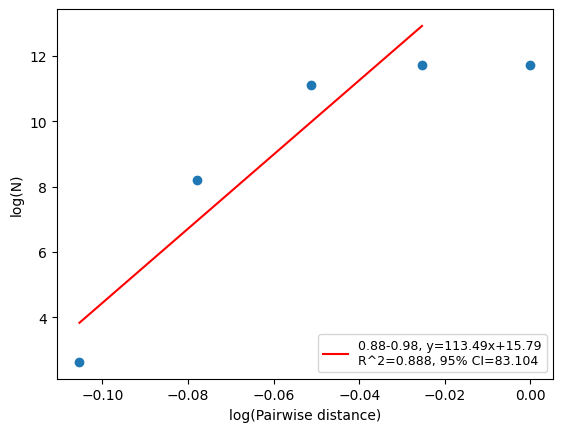

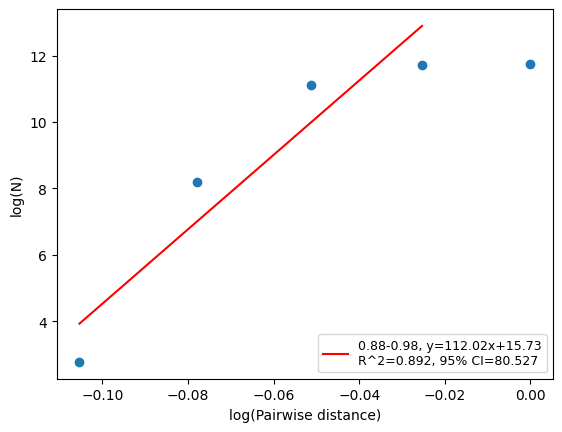

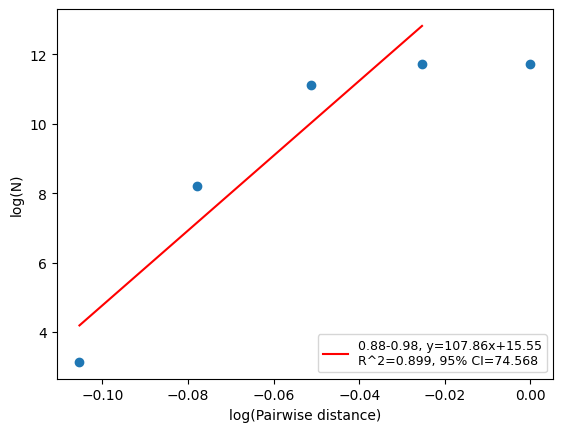

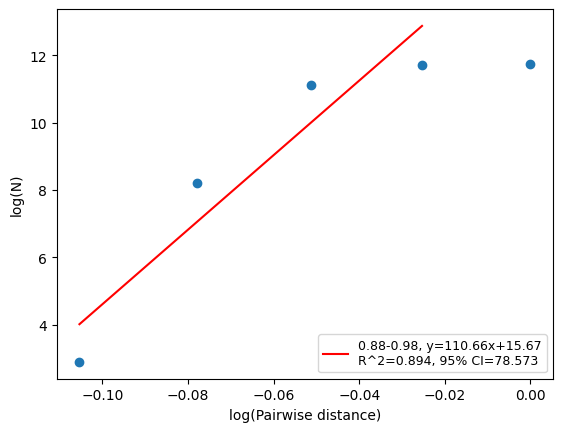

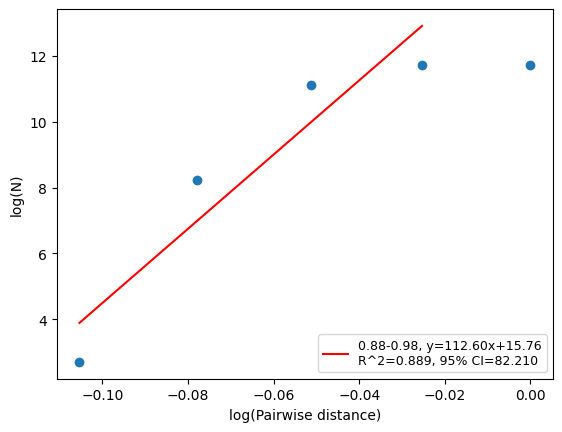

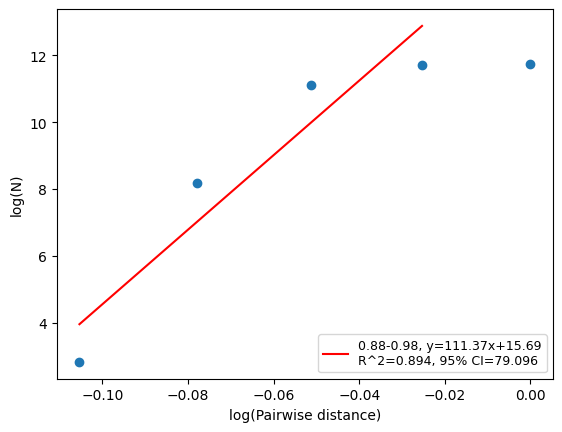

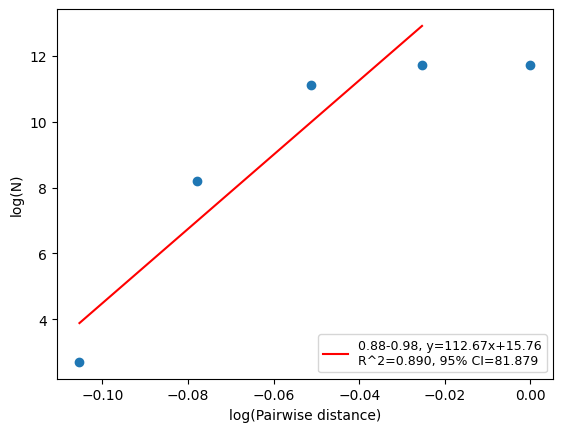

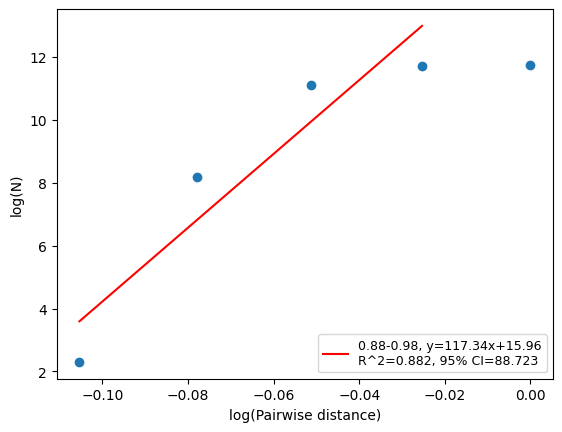

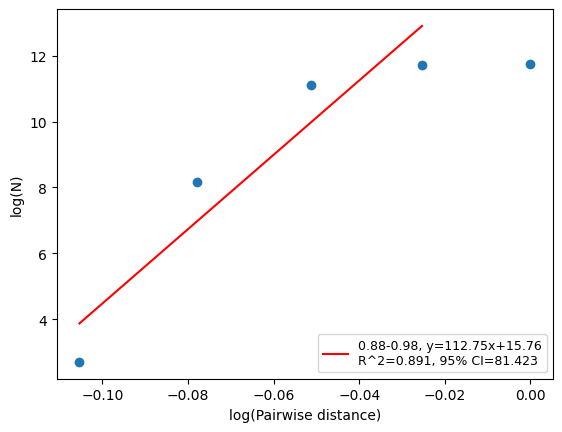

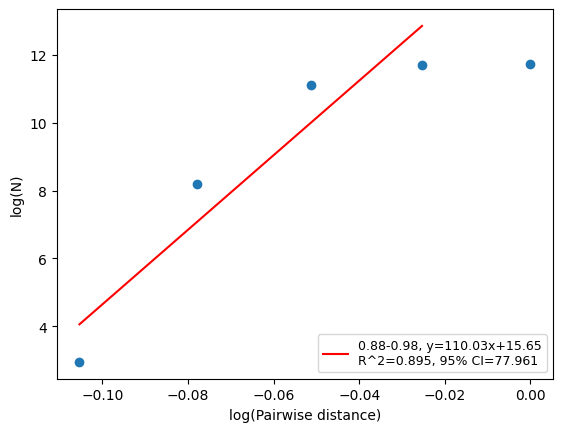

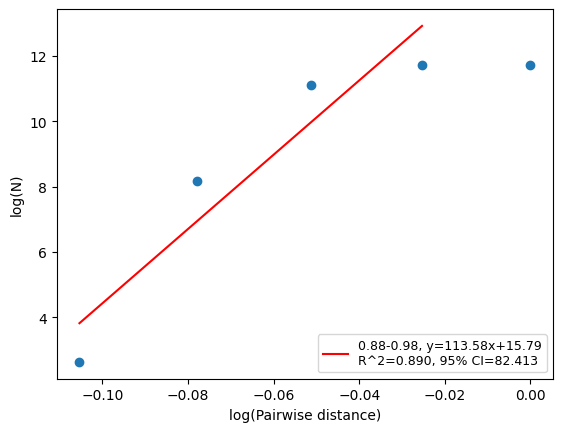

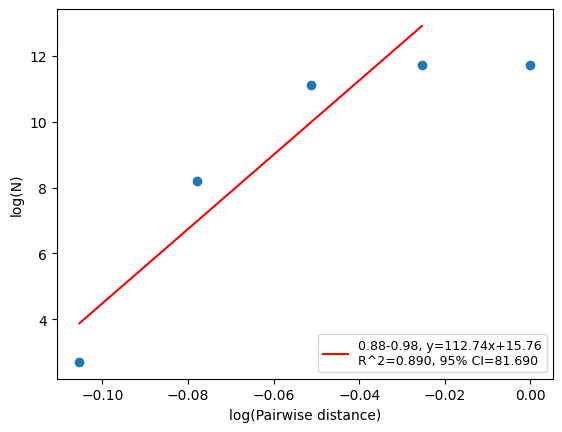

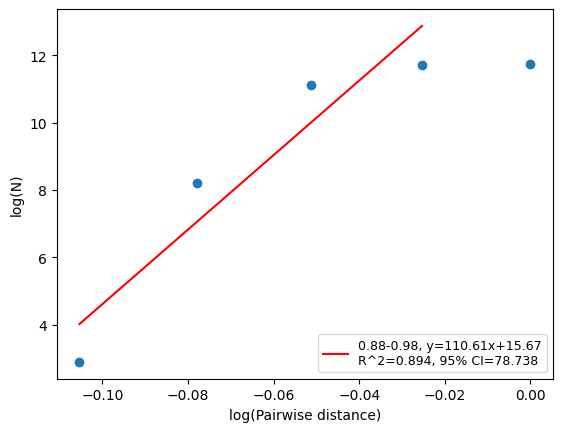

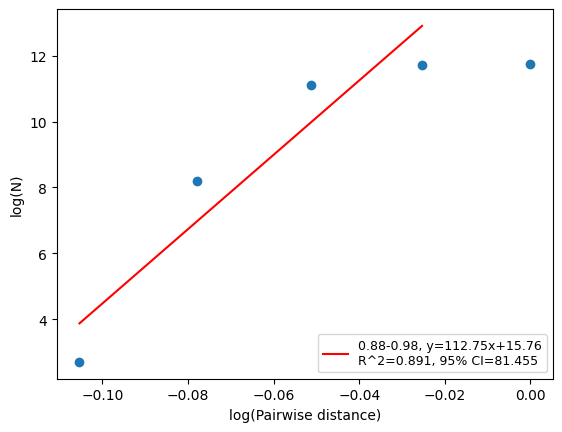

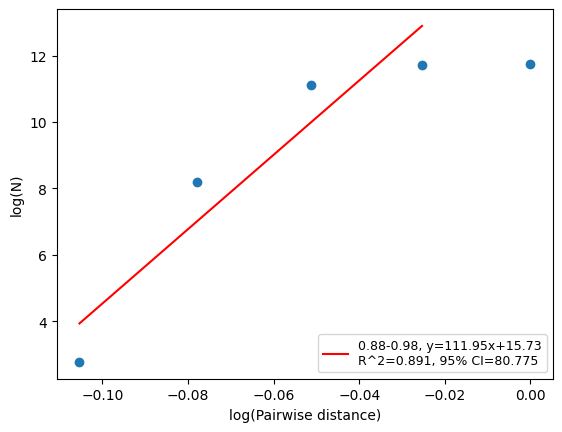

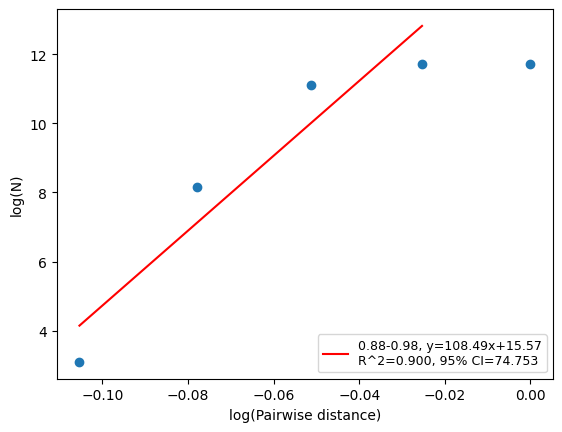

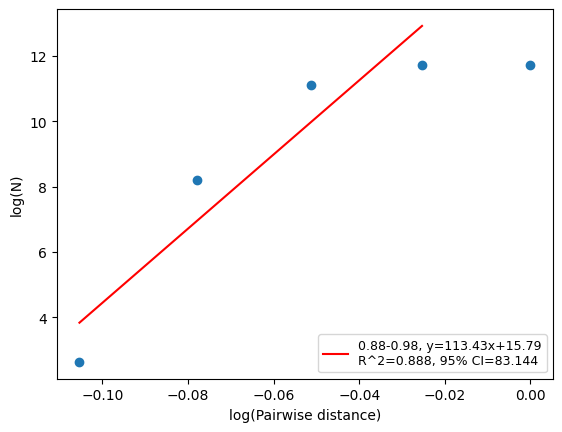

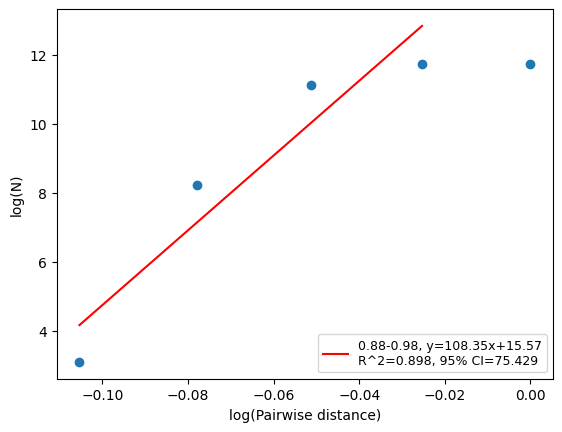

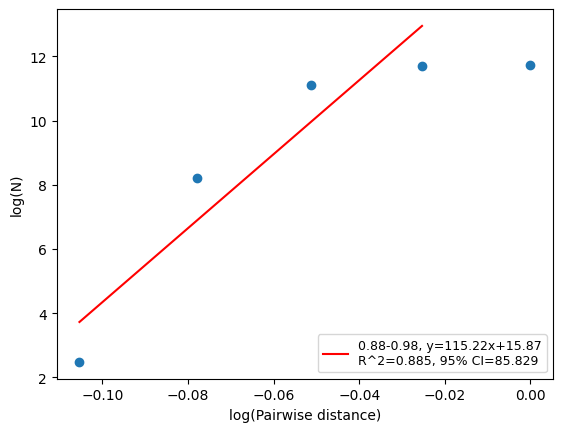

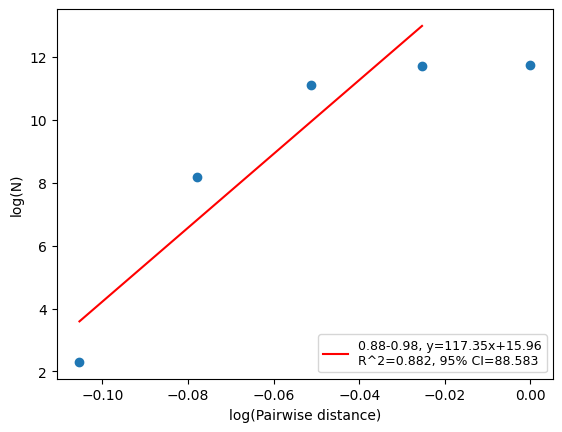

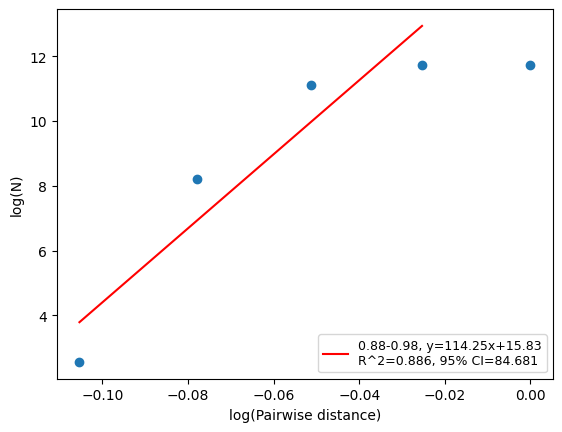

In [ ]:
len100 = []
average100 = []
for i in range(50):
    distance, average_distance = calculate_distance(generate_sequences(300, 500))
    len100.append(max_k(distance)[0])
    average100.append(average_distance)
    


(array([ 2.,  0.,  1.,  6.,  4.,  8.,  5., 11.,  9.,  4.]),
 array([73.86393086, 75.05881712, 76.25370337, 77.44858962, 78.64347588,
        79.83836213, 81.03324839, 82.22813464, 83.4230209 , 84.61790715,
        85.81279341]),
 <BarContainer object of 10 artists>)

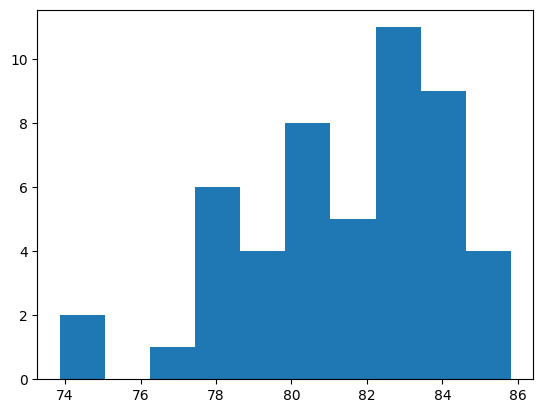

In [ ]:

plt.hist(len100)



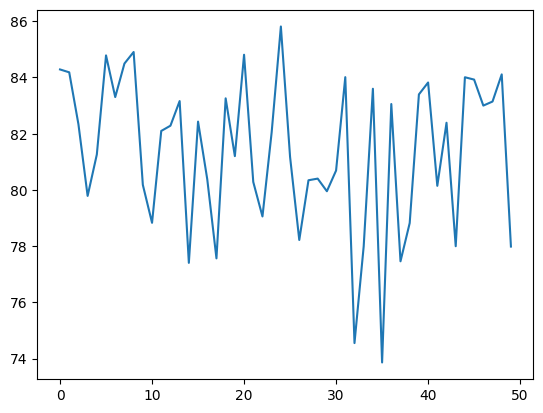

In [ ]:
plt.plot(len100)

(array([72.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  2., 25.]),
 array([ 39.0478891 ,  48.68277689,  58.31766469,  67.95255248,
         77.58744027,  87.22232807,  96.85721586, 106.49210365,
        116.12699144, 125.76187924, 135.39676703]),
 <BarContainer object of 10 artists>)

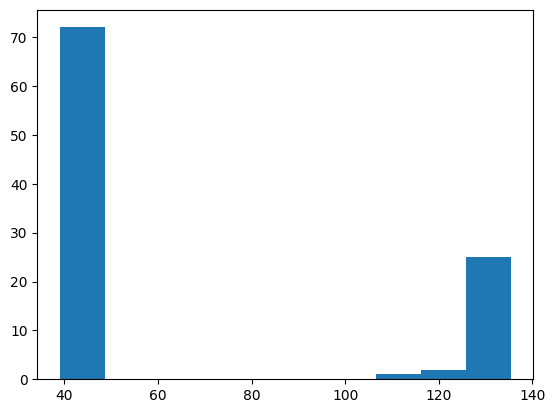

In [ ]:
plt.hist(len100[100:])